In [84]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns

import xgboost as xgb

from autoviz.AutoViz_Class import AutoViz_Class
from feature_engine.encoding import OrdinalEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

In [8]:
rta_data = pd.read_csv('data/RTA Dataset.csv')
print(rta_data.shape)
rta_data.head()

(12316, 32)


,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,NaN,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,No defect,Recreational areas,other,NaN,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,2,2,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,2,2,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [9]:
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [10]:
# Casting the variables to the correct data types
rta_data['Time'] = pd.to_datetime(rta_data['Time'])

### We will analyse the following:

1. Target variable
2. Variable Types (categorical and numerical)
3. Missing data
4. Numerical variables
    - Discrete
    - Continuous
    - Distributions
    - Transformations
5. Categorical variables
    - Cardinality
    - Rare labels
    - Special mappings

#### 1. Exploring target variable

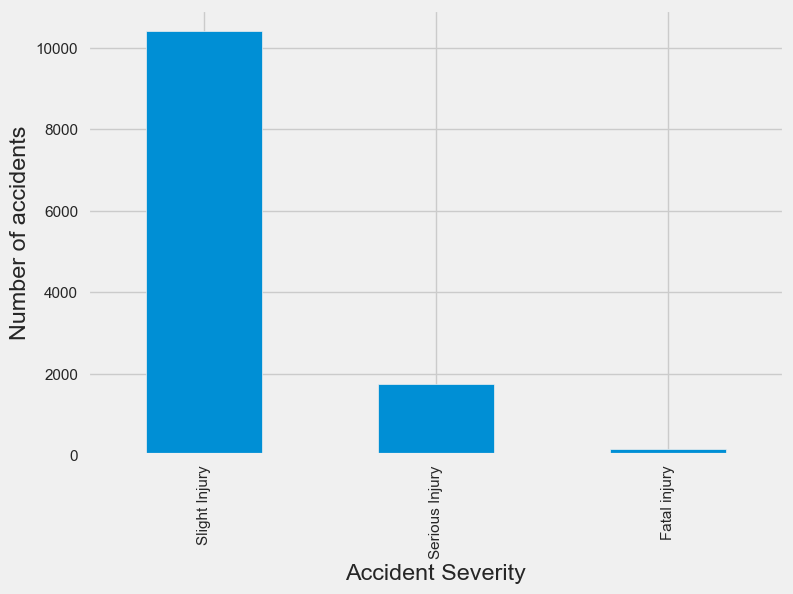

In [11]:
rta_data['Accident_severity'].value_counts().plot(kind='bar')
plt.ylabel('Number of accidents')
plt.xlabel('Accident Severity')
plt.show()

In [47]:
rta_data['Accident_severity'].isnull().sum()

0

Shape of your Data Set loaded: (12316, 32)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Time,1074,datetime64[ns],0,0.000000,8.720364,0,
Cause_of_accident,20,object,0,0.000000,0.162390,25,
Type_of_vehicle,17,object,950,7.713543,0.138032,21,"fill missing, fix mixed data types"
Area_accident_occured,14,object,239,1.940565,0.113673,1,"fill missing, fix mixed data types"
Vehicle_movement,13,object,308,2.500812,0.105554,10,"fill missing, fix mixed data types"
Type_of_collision,10,object,155,1.258525,0.081195,9,"fill missing, fix mixed data types"
Pedestrian_movement,9,object,0,0.000000,0.073076,7,
Weather_conditions,9,object,0,0.000000,0.073076,10,
Road_allignment,9,object,142,1.152972,0.073076,19,"fill missing, fix mixed data types"
Number_of_casualties,8,int64,0,0.000000,0.064956,0,


    31 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Multi_Classification problem #####################
Number of variables = 31 exceeds limit, finding top 30 variables through XGBoost
    No categorical feature reduction done. All 29 Categorical vars selected 
    Removing correlated variables from 2 numerics using SULO method
Selecting all (2) variables since none of them are highly correlated...
    Adding 29 categorical variables to reduced numeric variables  of 2
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 31 
    Finding Important Features using Boosted Trees algorithm...
        using 31 variables...
Finding top features using XGB is crashing. Continuing with all predictors...
    Since number of features selected is greater than max columns analyzed, limiting to 30 variables
###############################################################

,Nuniques,dtype,Nulls,Nullpercent,NuniquePercent,Value counts Min,Data cleaning improvement suggestions
Time,1074,datetime64[ns],0,0.000000,8.720364,0,
Type_of_vehicle,17,object,950,7.713543,0.138032,21,"fill missing, fix mixed data types"
Area_accident_occured,14,object,239,1.940565,0.113673,1,"fill missing, fix mixed data types"
Vehicle_movement,13,object,308,2.500812,0.105554,10,"fill missing, fix mixed data types"
Type_of_collision,10,object,155,1.258525,0.081195,9,"fill missing, fix mixed data types"
Road_allignment,9,object,142,1.152972,0.073076,19,"fill missing, fix mixed data types"
Weather_conditions,9,object,0,0.000000,0.073076,10,
Pedestrian_movement,9,object,0,0.000000,0.073076,7,
Types_of_Junction,8,object,887,7.202014,0.064956,12,"fill missing, fix mixed data types"
Number_of_casualties,8,int64,0,0.000000,0.064956,0,


    30 Predictors classified...
    No variables removed since no ID or low-information variables found in data
    List of variables removed: []
   Total columns > 30, too numerous to print.


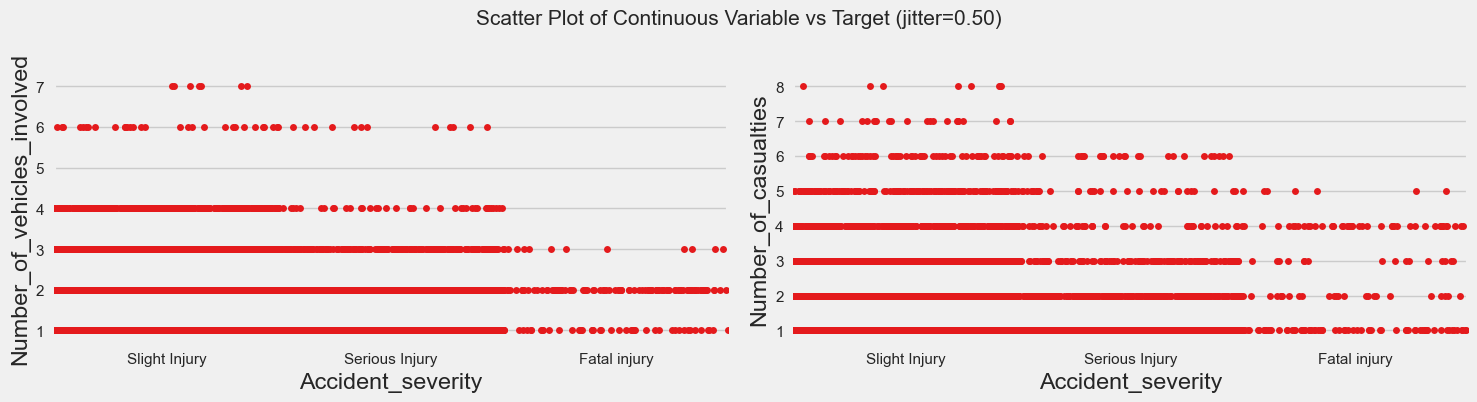

Total Number of Scatter Plots = 3


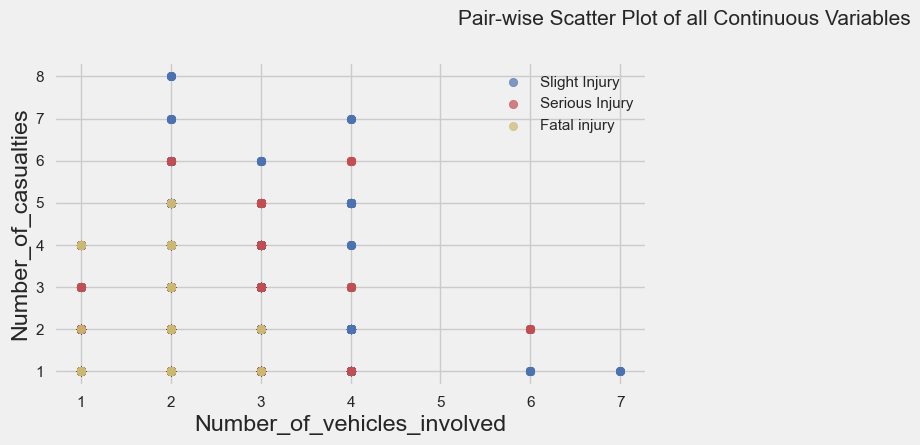

Could not draw some Distribution Plots


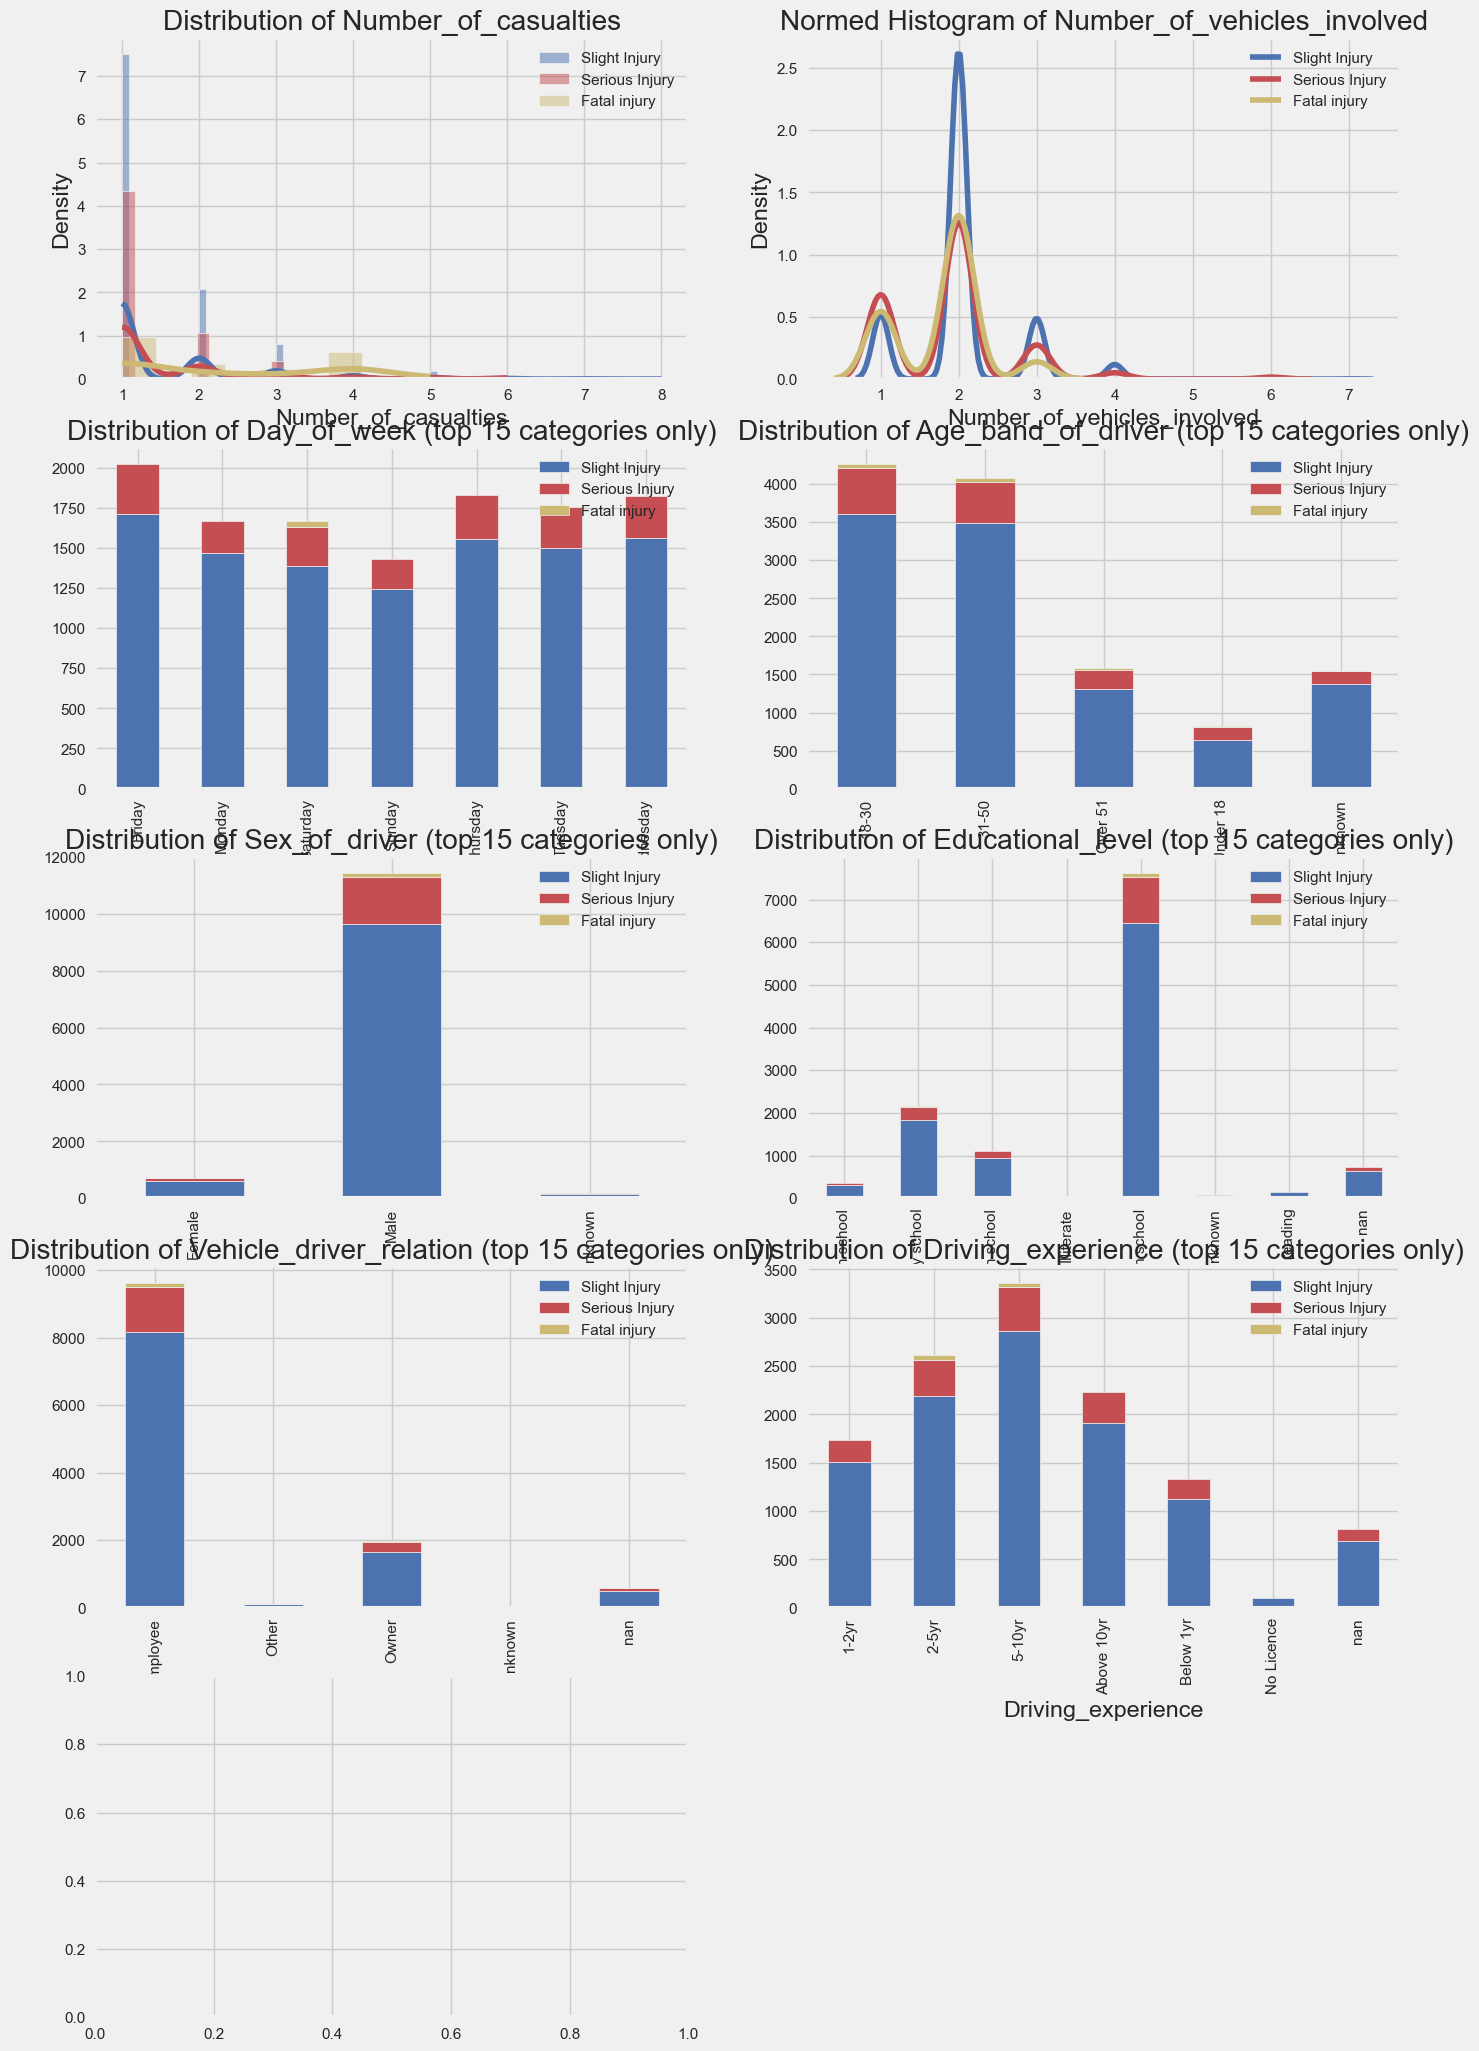

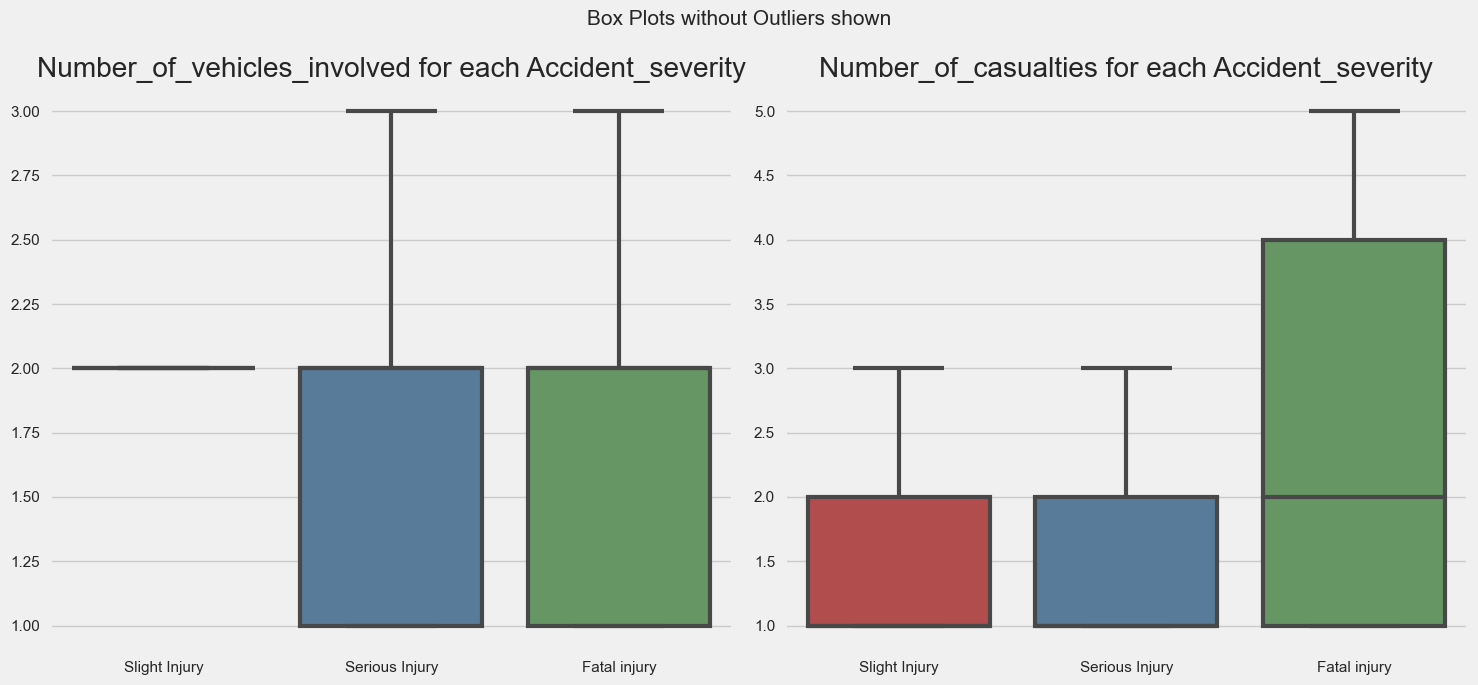

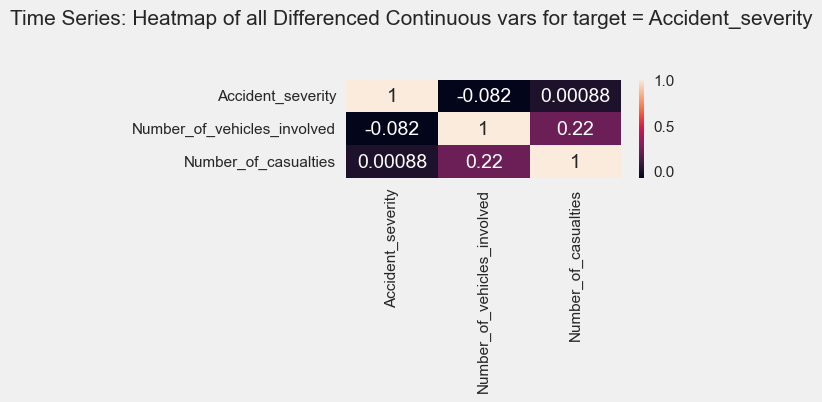

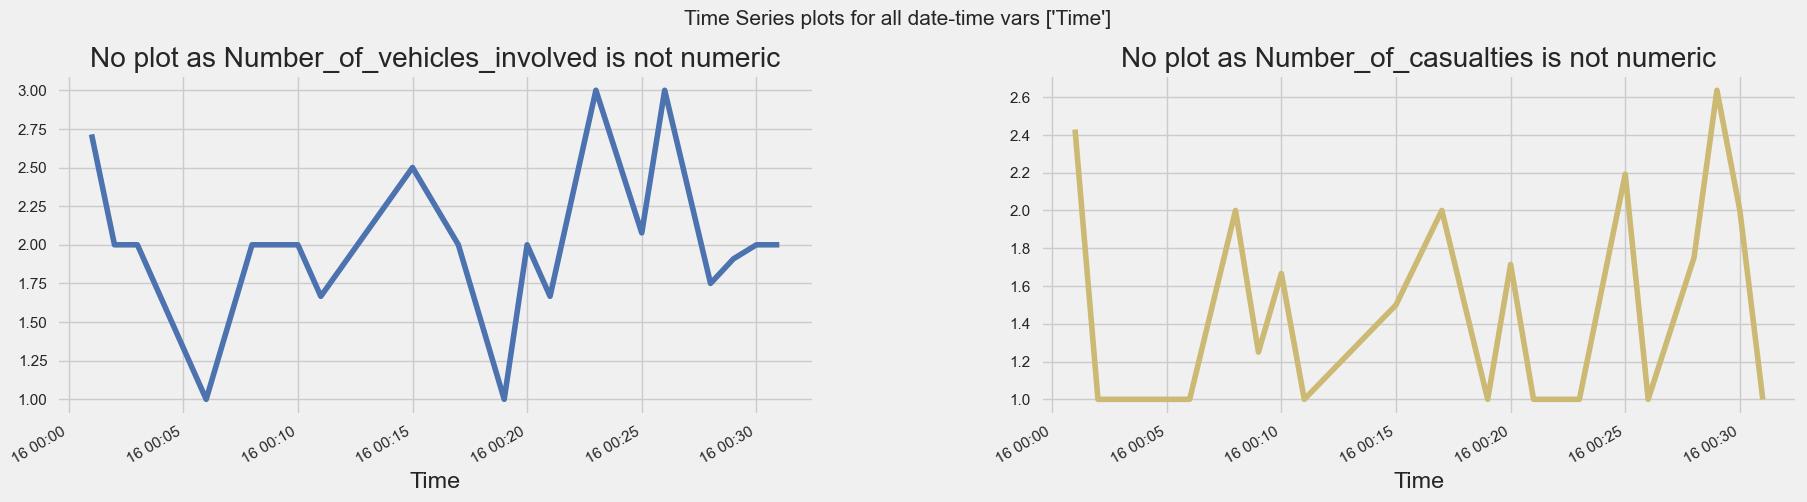

Could not draw some Time Series plots
Could not draw some Pivot Charts against Dependent Variable


ValueError: Image size of 2000x88000 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 2000x88000 with 351 Axes>

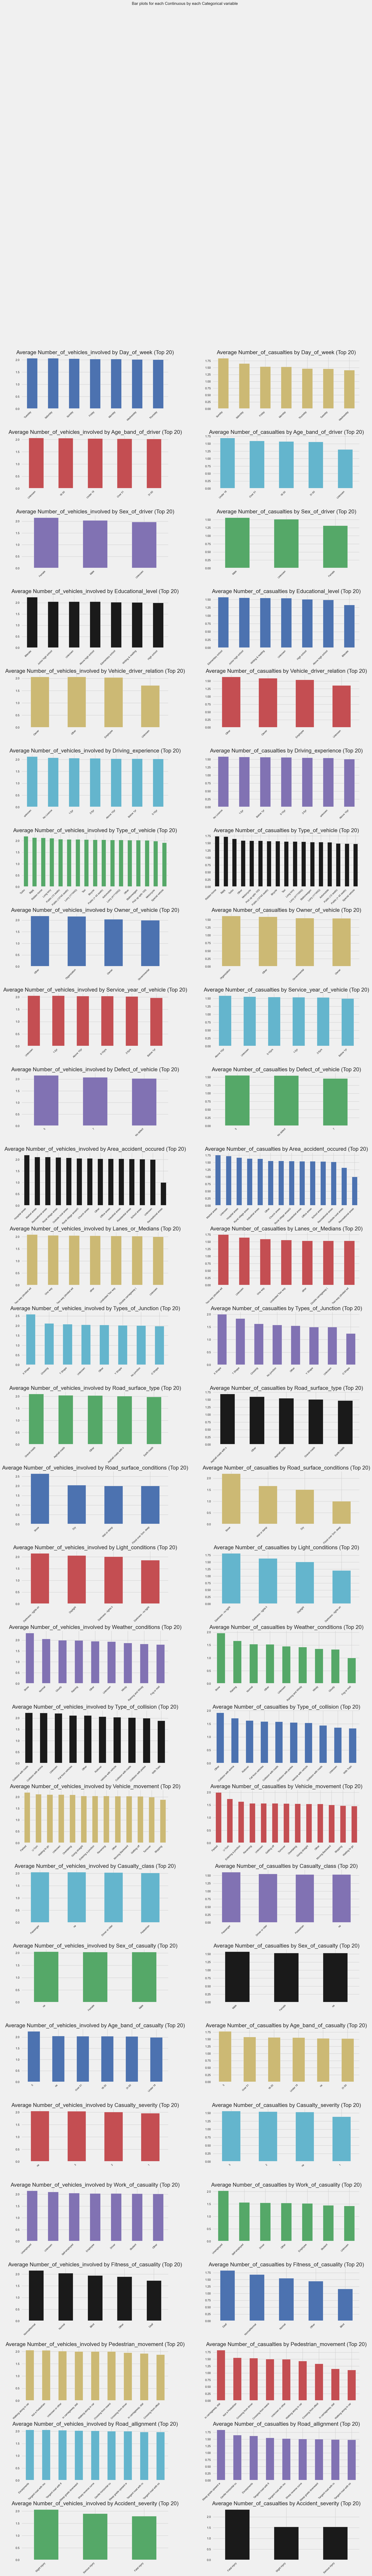

All Plots done
Time to run AutoViz = 60 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [12]:
AV = AutoViz_Class()
dft = AV.AutoViz(filename='', sep=',', depVar='Accident_severity', dfte=rta_data, header=0, verbose=1, 
                 lowess=False, chart_format='svg', save_plot_dir='../reports/figures')
plt.show()

#### 2. Variable Types

In [13]:
categorical = [var for var in rta_data.columns if rta_data[var].dtype=='O' and var!='Accident_severity']
print('There are {} categorical variables'.format(len(categorical)))

There are 28 categorical variables


In [14]:
numerical = [var for var in rta_data.columns if rta_data[var].dtype!='O' and var!='Accident_severity']
print('There are {} numerical variables'.format(len(numerical)))

There are 3 numerical variables


#### 3. Missing values

In [15]:
vars_with_na = [var for var in rta_data.columns if rta_data[var].isnull().sum()>0]
print('There are {} variables with missing values'.format(len(vars_with_na)))
print(rta_data[vars_with_na].isnull().mean().sort_values(ascending=False))

There are 16 variables with missing values
Defect_of_vehicle          0.359451
Service_year_of_vehicle    0.318935
Work_of_casuality          0.259662
Fitness_of_casuality       0.213949
Type_of_vehicle            0.077135
Types_of_Junction          0.072020
Driving_experience         0.067311
Educational_level          0.060166
Vehicle_driver_relation    0.047012
Owner_of_vehicle           0.039136
Lanes_or_Medians           0.031260
Vehicle_movement           0.025008
Area_accident_occured      0.019406
Road_surface_type          0.013966
Type_of_collision          0.012585
Road_allignment            0.011530
dtype: float64


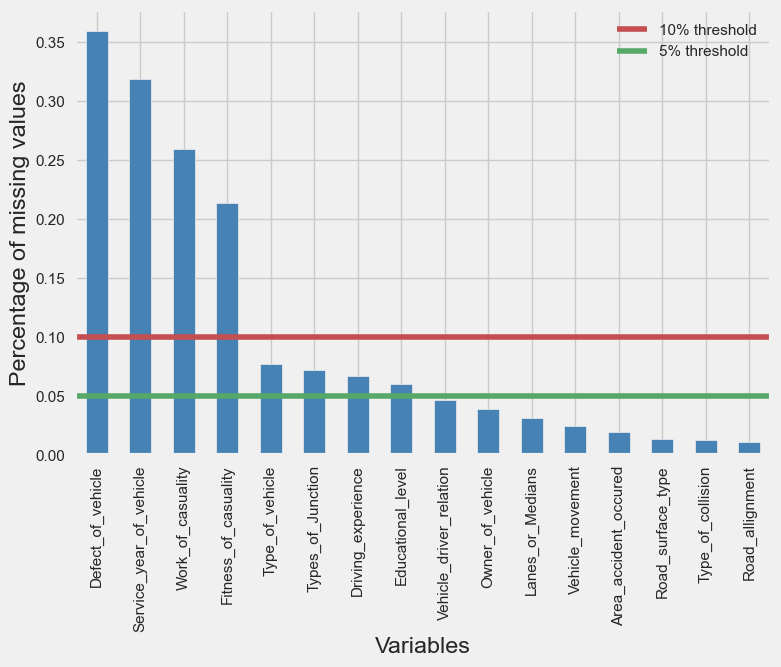

In [16]:
#plotting the missing values

rta_data[vars_with_na].isnull().mean().sort_values(ascending=False).plot.bar(color='steelblue')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')
plt.axhline(y=0.10, color='r', linestyle='-')
plt.axhline(y=0.05, color='g', linestyle='-')
plt.legend(['10% threshold', '5% threshold'])
plt.show()

In [17]:
categorical_nan = [var for var in categorical if var in vars_with_na]
print('There are {} categorical variables with missing values'.format(len(categorical_nan)))

numerical_nan = [var for var in numerical if var in vars_with_na]
print('There are {} numerical variables with missing values'.format(len(numerical_nan)))

There are 16 categorical variables with missing values
There are 0 numerical variables with missing values


In [18]:
categorical

['Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident']

In [19]:
# Finding columns containing the string 'na'
columns_with_na = [col for col in rta_data.columns if (rta_data[col] == 'na').any()]
columns_with_na

['Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity']

In [20]:
# Replace columns containing 'na' and np.nan with 'Missing'
for col in categorical:
    rta_data[col] = rta_data[col].replace(['na', np.nan], 'Missing')

#### 4. Numerical variables

In [21]:
numerical

['Time', 'Number_of_vehicles_involved', 'Number_of_casualties']

##### 4.1 Temporal variables

Hours: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


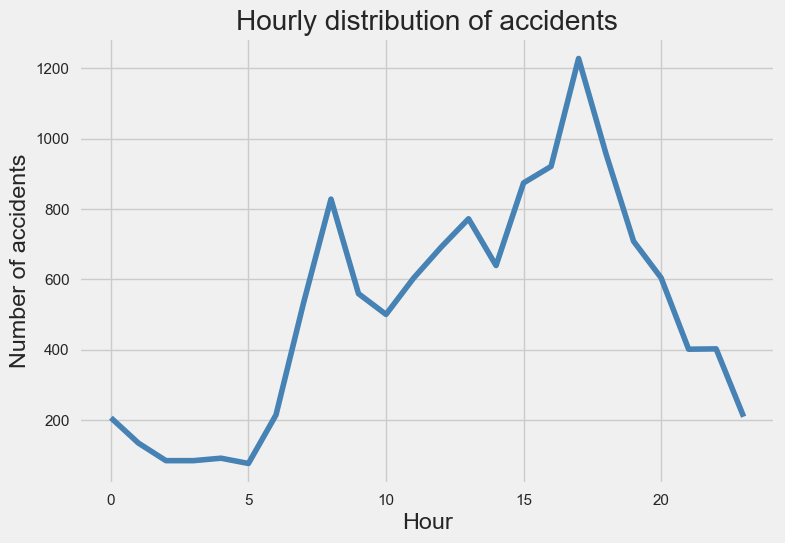

In [22]:
print(f"Hours: {np.sort(rta_data['Time'].dt.hour.unique())}")

# Hourly distribution of accidents
rta_data_copy = rta_data.copy()
rta_data_copy['hour'] = rta_data_copy['Time'].dt.hour

rta_data_copy.groupby('hour')['Accident_severity'].size().plot(kind='line', color='steelblue')
plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.title('Hourly distribution of accidents')
plt.show()

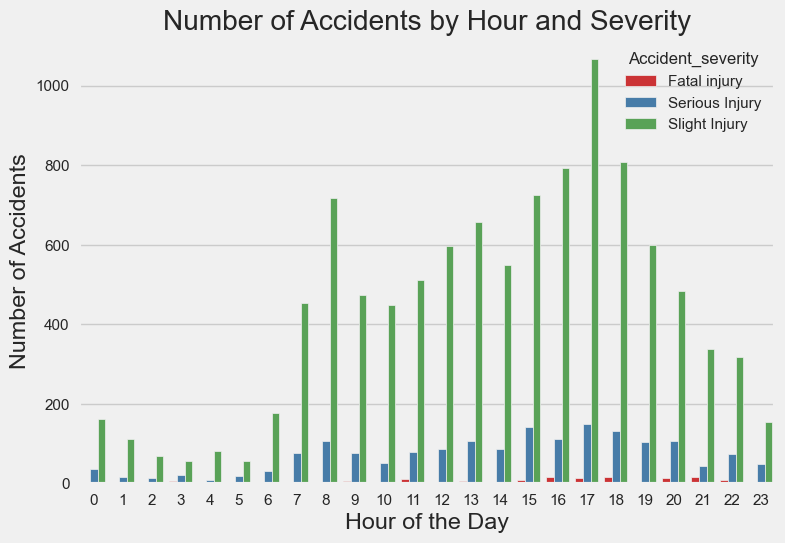

In [23]:
hourly_accidents = rta_data_copy.groupby(['hour', 'Accident_severity']).size().reset_index(name='count')

sns.barplot(data=hourly_accidents, x='hour', y='count', hue='Accident_severity')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Hour and Severity')
plt.show()

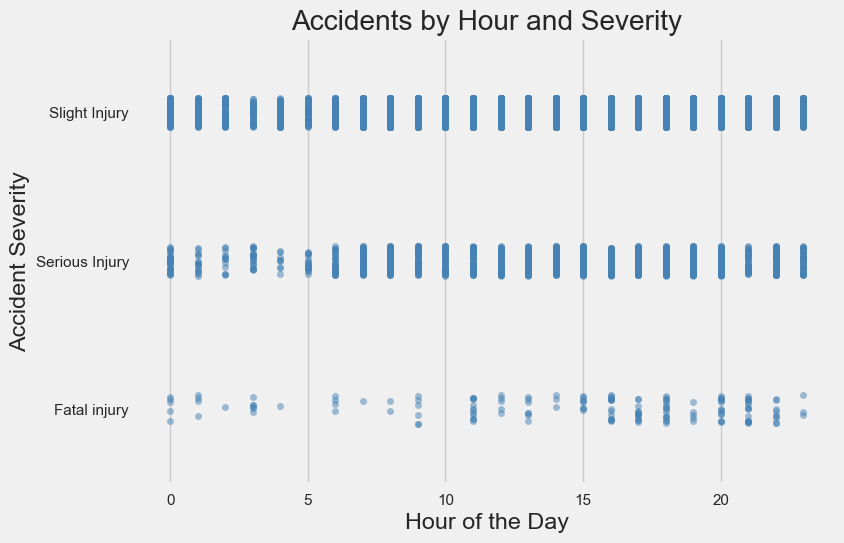

In [24]:
sns.stripplot(data=rta_data_copy, x='hour', y='Accident_severity', jitter=True, alpha=0.5, color='steelblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Accident Severity')
plt.title('Accidents by Hour and Severity')
plt.show()


##### 4.2 Discrete variables

In [25]:
discrete_vars = ['Number_of_vehicles_involved', 'Number_of_casualties']

In [26]:
rta_data['Number_of_vehicles_involved'].value_counts()

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

In [27]:
rta_data['Number_of_casualties'].value_counts()

Number_of_casualties
1    8397
2    2290
3     909
4     394
5     207
6      89
7      22
8       8
Name: count, dtype: int64

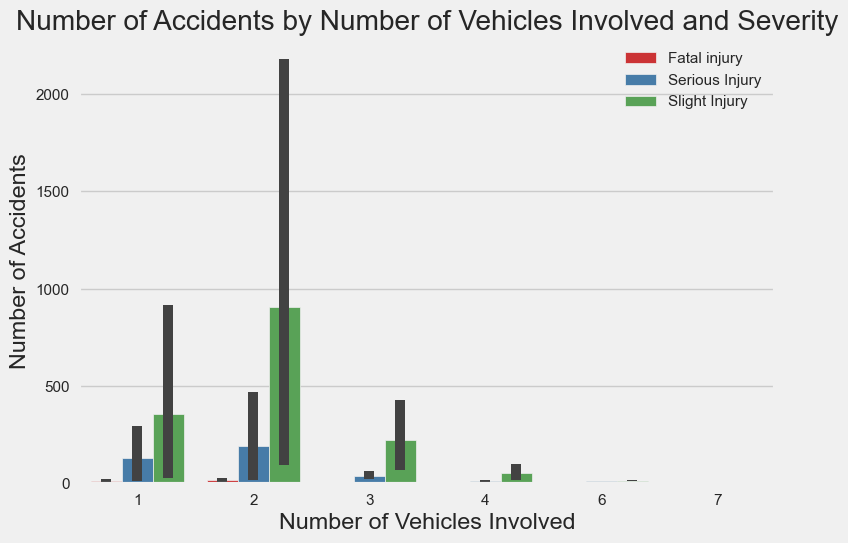

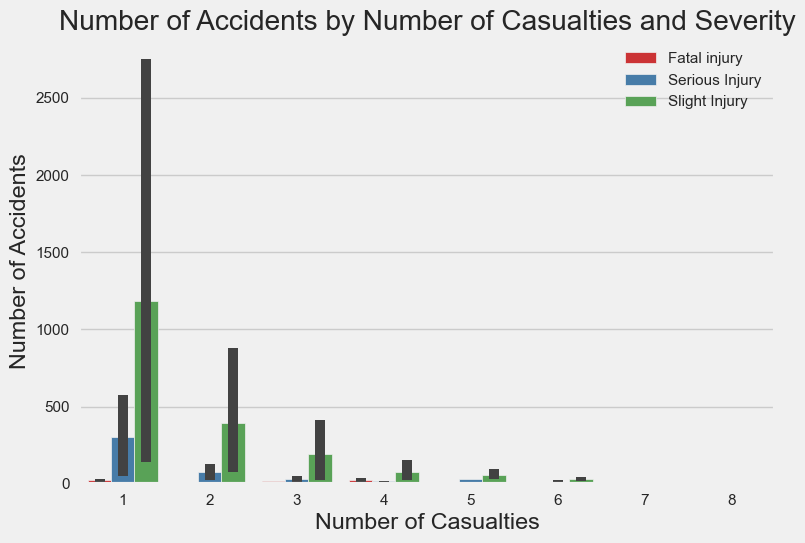

In [28]:
grouped_data = rta_data.groupby(['Number_of_vehicles_involved', 'Number_of_casualties', 'Accident_severity']).size().reset_index(name='count')

sns.barplot(data=grouped_data, x='Number_of_vehicles_involved', y='count', hue='Accident_severity')
plt.xlabel('Number of Vehicles Involved')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Number of Vehicles Involved and Severity')
plt.legend(loc='upper right')
plt.show()

sns.barplot(data=grouped_data, x='Number_of_casualties', y='count', hue='Accident_severity')
plt.xlabel('Number of Casualties')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Number of Casualties and Severity')
plt.legend(loc='upper right')
plt.show()

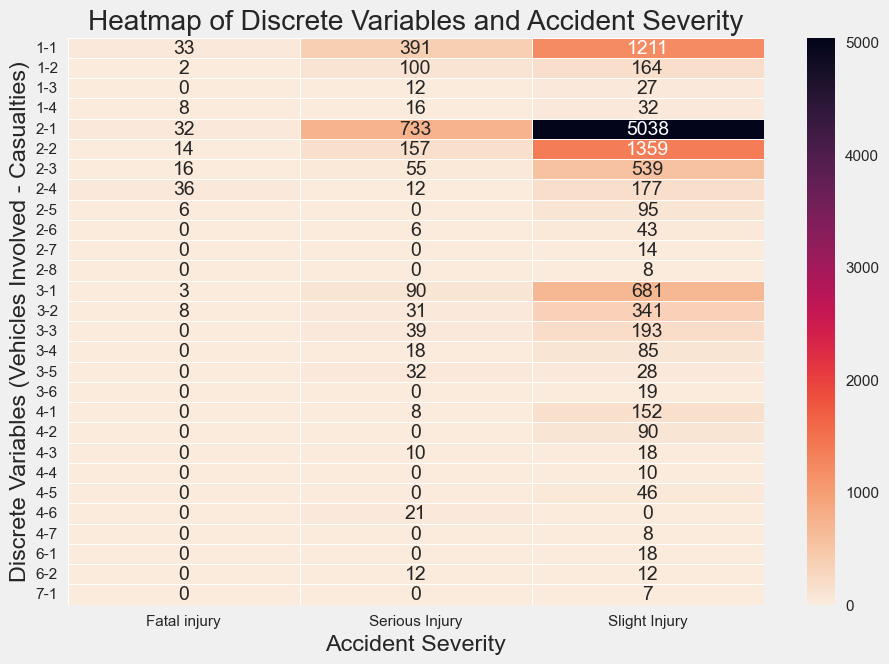

In [29]:
pivot_data = grouped_data.pivot_table(index=['Number_of_vehicles_involved', 'Number_of_casualties'], columns='Accident_severity', values='count', fill_value=0)

plt.figure(figsize=(10, 7))
sns.heatmap(pivot_data, cmap='rocket_r', annot=True, fmt='d', linewidths=0.5)
plt.xlabel('Accident Severity')
plt.ylabel('Discrete Variables (Vehicles Involved - Casualties)')
plt.title('Heatmap of Discrete Variables and Accident Severity')
plt.show()

#### 5. Categorical variables

##### 5.1 Cardinality: number of labels/categories in each variable

<Axes: >

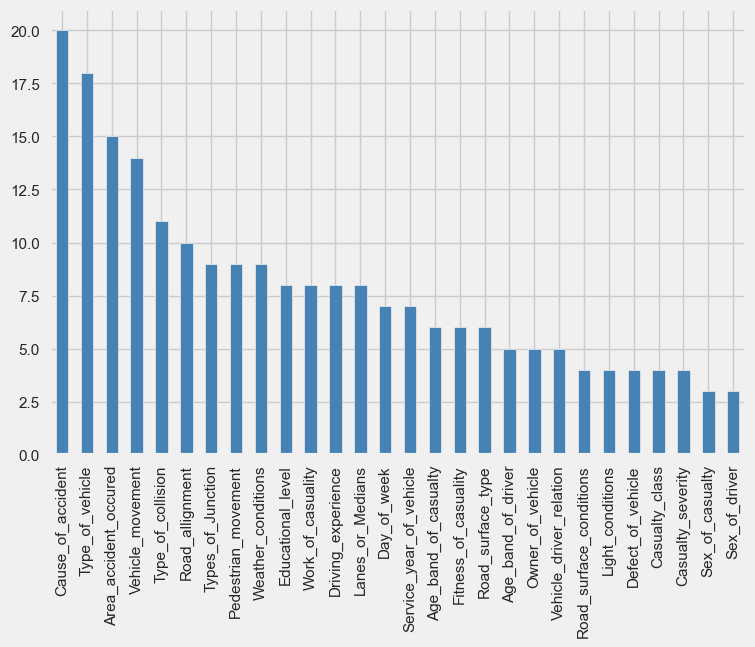

In [30]:
rta_data[categorical].nunique().sort_values(ascending=False).plot.bar(color='steelblue')

In [31]:
rta_data[categorical].head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident
0,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,No defect,Residential areas,Missing,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Missing,Missing,Missing,Missing,Missing,Missing,Not a Pedestrian,Moving Backward
1,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,No defect,Office areas,Undivided Two way,Tangent road with flat terrain,No junction,Asphalt roads,Dry,Daylight,Normal,Vehicle with vehicle collision,Going straight,Missing,Missing,Missing,Missing,Missing,Missing,Not a Pedestrian,Overtaking
2,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Missing,No defect,Recreational areas,other,Missing,No junction,Asphalt roads,Dry,Daylight,Normal,Collision with roadside objects,Going straight,Driver or rider,Male,31-50,3,Driver,Missing,Not a Pedestrian,Changing lane to the left
3,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Missing,No defect,Office areas,other,Tangent road with mild grade and flat terrain,Y Shape,Earth roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right
4,Sunday,18-30,Male,Junior high school,Employee,2-5yr,Missing,Owner,5-10yrs,No defect,Industrial areas,other,Tangent road with flat terrain,Y Shape,Asphalt roads,Dry,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Missing,Missing,Missing,Missing,Missing,Missing,Not a Pedestrian,Overtaking


In [32]:
for var in categorical:
    unique_vals = rta_data[var].unique()
    print(f"{var}: {unique_vals} | Total: {len(unique_vals)}\n")

Day_of_week: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday'] | Total: 7

Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown'] | Total: 5

Sex_of_driver: ['Male' 'Female' 'Unknown'] | Total: 3

Educational_level: ['Above high school' 'Junior high school' 'Missing' 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading'] | Total: 8

Vehicle_driver_relation: ['Employee' 'Unknown' 'Owner' 'Missing' 'Other'] | Total: 5

Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'Missing' 'No Licence' 'Below 1yr'
 'unknown'] | Total: 8

Type_of_vehicle: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' 'Missing'
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick up upto 10Q' 'Stationwagen' 'Ridden horse' 'Other' 'Bajaj'
 'Turbo' 'Motorcycle' 'Special vehicle' 'Bicycle'] | Total: 18

Owner_of_vehicle: ['Owner' 'Governmental' 'Missing' 'Organization' 'Other'] | Total: 5

Service_year_of_vehi

##### 5.2 Encoding categorical variables

In [74]:
ordinal_encoder = OrdinalEncoder(encoding_method='arbitrary', variables=categorical)
rta_data_transformed = ordinal_encoder.fit_transform(rta_data)

In [75]:
rta_data_transformed.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,2023-05-16 17:02:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,Slight Injury
1,2023-05-16 17:02:00,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,2,2,0,0,0,0,0,0,0,0,1,Slight Injury
2,2023-05-16 17:02:00,0,0,0,1,0,0,2,0,2,0,2,2,1,0,0,0,0,0,2,2,2,0,1,1,1,1,1,0,0,2,Serious Injury
3,2023-05-16 01:06:00,1,0,0,1,0,2,1,1,2,0,1,2,2,1,1,0,1,0,1,2,2,0,2,2,2,1,1,1,0,3,Slight Injury
4,2023-05-16 01:06:00,1,0,0,1,0,3,3,0,1,0,3,2,0,1,0,0,1,0,1,2,2,0,0,0,0,0,0,0,0,1,Slight Injury


In [76]:
rta_data_transformed['Hour'] = rta_data_transformed['Time'].dt.hour
rta_data_transformed.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,2023-05-16 17:02:00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,Slight Injury,17
1,2023-05-16 17:02:00,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,2,2,0,0,0,0,0,0,0,0,1,Slight Injury,17
2,2023-05-16 17:02:00,0,0,0,1,0,0,2,0,2,0,2,2,1,0,0,0,0,0,2,2,2,0,1,1,1,1,1,0,0,2,Serious Injury,17
3,2023-05-16 01:06:00,1,0,0,1,0,2,1,1,2,0,1,2,2,1,1,0,1,0,1,2,2,0,2,2,2,1,1,1,0,3,Slight Injury,1
4,2023-05-16 01:06:00,1,0,0,1,0,3,3,0,1,0,3,2,0,1,0,0,1,0,1,2,2,0,0,0,0,0,0,0,0,1,Slight Injury,1


In [77]:
rta_data_transformed.drop('Time', axis=1, inplace=True)
rta_data_transformed.to_csv('data/RTA Dataset Transformed.csv', index=False)

#####  6. Splitting the dataset into train, valid and test

In [78]:
target_encoder = OrdinalEncoder(encoding_method='arbitrary', variables='Accident_severity')
rta_data_transformed = target_encoder.fit_transform(rta_data_transformed)

In [79]:
rta_data_transformed.head()

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,Area_accident_occured,Lanes_or_Medians,Road_allignment,Types_of_Junction,Road_surface_type,Road_surface_conditions,Light_conditions,Weather_conditions,Type_of_collision,Number_of_vehicles_involved,Number_of_casualties,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hour
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,17
1,0,1,0,1,0,1,1,0,1,0,1,1,0,0,0,0,0,0,1,2,2,0,0,0,0,0,0,0,0,1,0,17
2,0,0,0,1,0,0,2,0,2,0,2,2,1,0,0,0,0,0,2,2,2,0,1,1,1,1,1,0,0,2,1,17
3,1,0,0,1,0,2,1,1,2,0,1,2,2,1,1,0,1,0,1,2,2,0,2,2,2,1,1,1,0,3,0,1
4,1,0,0,1,0,3,3,0,1,0,3,2,0,1,0,0,1,0,1,2,2,0,0,0,0,0,0,0,0,1,0,1


In [80]:
X = rta_data_transformed.drop('Accident_severity', axis=1).values
y = rta_data_transformed['Accident_severity'].values

In [81]:
# Initialize the StratifiedShuffleSplit object
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Split for train and temp (which will be further divided into validation and test)
for train_index, temp_index in sss.split(X, y):
    X_train, X_temp = X[train_index], X[temp_index]
    y_train, y_temp = y[train_index], y[temp_index]

# Now split the temp data into validation and test sets
sss_valid_test = StratifiedShuffleSplit(n_splits=1, test_size=0.5, random_state=42)

for valid_index, test_index in sss_valid_test.split(X_temp, y_temp):
    X_valid, X_test = X_temp[valid_index], X_temp[test_index]
    y_valid, y_test = y_temp[valid_index], y_temp[test_index]

In [82]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_valid: {X_valid.shape}, y_valid: {y_valid.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (9852, 31), y_train: (9852,)
X_valid: (1232, 31), y_valid: (1232,)
X_test: (1232, 31), y_test: (1232,)


#### 7. Model Building

##### 7.1 Decision Tree Classifier

In [83]:
decision_tree = DecisionTreeClassifier(random_state=2022, max_depth=2)
decision_tree = decision_tree.fit(X_train, y_train)
decision_tree_predictions = decision_tree.predict(X_valid)

print(f"Accuracy: {accuracy_score(y_valid, decision_tree_predictions)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_valid, decision_tree_predictions)}")

Accuracy: 0.8457792207792207
Confusion Matrix: 
[[1039    3    0]
 [ 171    3    0]
 [  16    0    0]]


##### 7.2 Random Forest Classifier

In [85]:
random_forest = RandomForestClassifier(random_state=2022, max_depth=2)
random_forest = random_forest.fit(X_train, y_train)
random_forest_predictions = random_forest.predict(X_valid)

print(f"Accuracy: {accuracy_score(y_valid, random_forest_predictions)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_valid, random_forest_predictions)}")

Accuracy: 0.8457792207792207
Confusion Matrix: 
[[1042    0    0]
 [ 174    0    0]
 [  16    0    0]]


##### 7.3 XGBoost Classifier

In [86]:
xgboost = xgb.XGBClassifier(random_state=2022, max_depth=2)
xgboost = xgboost.fit(X_train, y_train)
xgboost_predictions = xgboost.predict(X_valid)

print(f"Accuracy: {accuracy_score(y_valid, xgboost_predictions)}")
print(f"Confusion Matrix: \n{confusion_matrix(y_valid, xgboost_predictions)}")

Accuracy: 0.8474025974025974
Confusion Matrix: 
[[1037    5    0]
 [ 167    7    0]
 [  16    0    0]]
